<a href="https://colab.research.google.com/github/mrymalsubhi/BankOfTheFutureProject/blob/main/BankOfTheFuture_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing important libraries:
import pandas as pd
import numpy as np
from datetime import datetime
from scipy import stats

In [ ]:
query = "SELECT * FROM `ardent-bridge-400707.Neo_Bank.users_info`"
df_users_info = pd.read_gbq(query, project_id="ardent-bridge-400707")

In [ ]:
df_users_info= df_users_info.drop(['user_id'], axis=1)
df_users_info= df_users_info.drop(['created_date'], axis=1)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Select the categorical columns to encode
categorical_columns = [ 'crypto_unlocked', 'brand', 'contacts', 'country_name', 'age_group']

# Create an instance of the OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Encode the categorical columns
encoded_columns = encoder.fit_transform(df_users_info[categorical_columns])

# Create a DataFrame with the encoded columns
df_encoded = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(categorical_columns))

# Concatenate the encoded columns with the original DataFrame
df_ML = pd.concat([df_users_info[['user_type','activity_duration']], df_encoded], axis=1)

# Drop the original categorical columns if desired
#df_ML.drop(categorical_columns, axis=1, inplace=True)

# Print the encoded DataFrame
print(df_ML.head(3))

         user_type  activity_duration  crypto_unlocked_No  \
0  Non Active User                256                 1.0   
1  Non Active User                263                 1.0   
2     At Risk user                263                 1.0   

   crypto_unlocked_Yes  brand_Android  brand_Apple  contacts_0-10  \
0                  0.0            0.0          1.0            1.0   
1                  0.0            1.0          0.0            1.0   
2                  0.0            1.0          0.0            1.0   

   contacts_10-50  contacts_201-500  contacts_51-200  ...  \
0             0.0               0.0              0.0  ...   
1             0.0               0.0              0.0  ...   
2             0.0               0.0              0.0  ...   

   country_name_Switzerland  country_name_United Kingdom  age_group_20s  \
0                       0.0                          0.0            0.0   
1                       0.0                          0.0            0.0   
2       

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
df_ML.columns


Index(['user_type', 'activity_duration', 'crypto_unlocked_No',
       'crypto_unlocked_Yes', 'brand_Android', 'brand_Apple', 'contacts_0-10',
       'contacts_10-50', 'contacts_201-500', 'contacts_51-200',
       'contacts_more than 500', 'country_name_Australia',
       'country_name_Austria', 'country_name_Belgium', 'country_name_Bulgaria',
       'country_name_Croatia', 'country_name_Cyprus',
       'country_name_Czech Republic', 'country_name_Denmark',
       'country_name_Estonia', 'country_name_Finland', 'country_name_France',
       'country_name_French Guiana', 'country_name_Germany',
       'country_name_Gibraltar', 'country_name_Greece',
       'country_name_Guadeloupe', 'country_name_Guernsey',
       'country_name_Hungary', 'country_name_Iceland', 'country_name_Ireland',
       'country_name_Isle of Man', 'country_name_Italy', 'country_name_Jersey',
       'country_name_Latvia', 'country_name_Liechtenstein',
       'country_name_Lithuania', 'country_name_Luxembourg',
      

In [ ]:

from sklearn.ensemble import RandomForestClassifier


X = df_ML[[
       'crypto_unlocked_No',
       'crypto_unlocked_Yes', 'brand_Android', 'brand_Apple', 'contacts_0-10',
       'contacts_10-50', 'contacts_201-500', 'contacts_51-200',
       'contacts_more than 500', 'country_name_Australia',
       'country_name_Austria', 'country_name_Belgium', 'country_name_Bulgaria',
       'country_name_Croatia', 'country_name_Cyprus',
       'country_name_Czech Republic', 'country_name_Denmark',
       'country_name_Estonia', 'country_name_Finland', 'country_name_France',
       'country_name_French Guiana', 'country_name_Germany',
       'country_name_Gibraltar', 'country_name_Greece',
       'country_name_Guadeloupe', 'country_name_Guernsey',
       'country_name_Hungary', 'country_name_Iceland', 'country_name_Ireland',
       'country_name_Isle of Man', 'country_name_Italy', 'country_name_Jersey',
       'country_name_Latvia', 'country_name_Liechtenstein',
       'country_name_Lithuania', 'country_name_Luxembourg',
       'country_name_Malta', 'country_name_Martinique',
       'country_name_Netherlands', 'country_name_Norway',
       'country_name_Poland', 'country_name_Portugal', 'country_name_Reunion',
       'country_name_Romania', 'country_name_Slovakia',
       'country_name_Slovenia', 'country_name_Spain', 'country_name_Sweden',
       'country_name_Switzerland', 'country_name_United Kingdom',
       'age_group_20s', 'age_group_30s', 'age_group_40s', 'age_group_50s',
       'age_group_60s', 'age_group_70s', 'age_group_80s', 'age_group_90s']]
y = df_ML['user_type']
rf = RandomForestClassifier()
rf.fit(X, y)

feature_importances = (rf.feature_importances_)*100

for feature, importance in zip(X.columns, feature_importances):
    print(f"{feature}: {importance}")


crypto_unlocked_No: 3.956336831377205
crypto_unlocked_Yes: 3.9220518531243034
brand_Android: 4.18973925207567
brand_Apple: 4.214575962191971
contacts_0-10: 7.29090845819123
contacts_10-50: 4.243141196929676
contacts_201-500: 0.83389547973857
contacts_51-200: 3.1185067527271326
contacts_more than 500: 0.2024275380979117
country_name_Australia: 0.2889142150222905
country_name_Austria: 0.8489030179498109
country_name_Belgium: 0.970367200195075
country_name_Bulgaria: 0.9753496450213592
country_name_Croatia: 0.7458822580658824
country_name_Cyprus: 1.2908646159505575
country_name_Czech Republic: 1.3600272579171149
country_name_Denmark: 0.8400020190863235
country_name_Estonia: 0.5384567568456582
country_name_Finland: 0.5849276647931728
country_name_France: 1.6921484636659039
country_name_French Guiana: 0.018413443404918108
country_name_Germany: 1.1679182691331902
country_name_Gibraltar: 0.7540553760000079
country_name_Greece: 1.0696431092713656
country_name_Guadeloupe: 0.250979333240185
count

In [ ]:
score_pd=pd.DataFrame(dict(zip(X.columns, feature_importances)).items(),columns=['columns','FI score'])
score_pd.sort_values('FI score',ascending=False).head(20)

,columns,FI score
4,contacts_0-10,7.290908
51,age_group_30s,5.298399
52,age_group_40s,4.879270
50,age_group_20s,4.650735
53,age_group_50s,4.516011
5,contacts_10-50,4.243141
3,brand_Apple,4.214576
2,brand_Android,4.189739
0,crypto_unlocked_No,3.956337
1,crypto_unlocked_Yes,3.922052


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy: 0.5124378109452736
Precision: 0.4384392540736755
Recall: 0.5124378109452736
F1-score: 0.42830712369658197


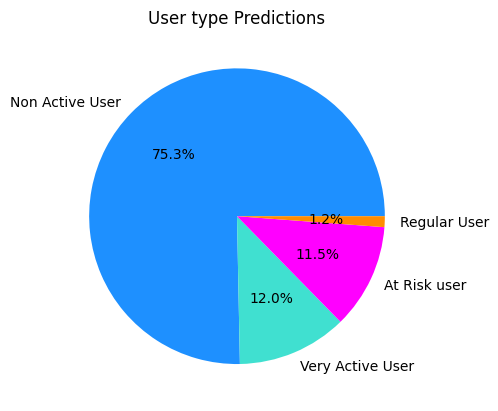

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import GridSearchCV

X_ML=df_ML.drop(['user_type'],axis=1)
y_ML = df_ML['user_type']

X_train, X_test, y_train, y_test = train_test_split(X_ML, y_ML, test_size=0.3)

model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,

                                                         max_features='auto',

                                                         min_samples_leaf=5,

                                                         random_state=11))
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


engagement = pd.Series(y_pred).value_counts()
labels = engagement.index.tolist()
values = engagement.values.tolist()
colors = ['dodgerblue', 'turquoise', 'magenta', 'darkorange']


plt.pie(values, labels=labels, autopct='%1.1f%%', colors=colors)
plt.title("User type Predictions")
plt.show()
